# Assignment - Ensemble Techniques 
### Parkinson's Disease Detection Classifier

## Background- 
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range)

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe.

Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

## Objective-
To iterate through algorithms to find the best possible model that can classify the patients into the respective labels using the attributes from their voice recordings

#### Steps and tasks-
1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes,types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard (5 points)
3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationshipsbetween variables etc. mention your observations (15 points)
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test) (5 points)
5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc (5 points)
6. Train at least 3 standard classification algorithms-LogisticRegression,Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data (10 points)
7. Train a meta-classifier and note the accuracy on test data (10 points)
8. Train at least one standard Ensemble model-Randomforest,Bagging,Boosting etc, and note the accuracy (10 points)
9. Compare all the models (minimum 5) and pick the best one among them (10 points)

In [1]:
## importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplot
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib.pyplot import figure, show
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier

In [2]:
## Reading Dataset
data = pd.read_csv('Data - Parkinsons')

### Initial Inspection of Data

In [297]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [298]:
print("Number of columns:", data.shape[1])
print("Number of rows:", data.shape[0],"\n")

Number of columns: 24
Number of rows: 195 



In [299]:
print("Column wise data type description and Null Values\n")
data.info();

Column wise data type description and Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float6

In [300]:
print("Statistical Summary of Dataset")
data.describe().T

Statistical Summary of Dataset


,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


#### Observations:
- The number of rows in the data is very small (195 rows). This may lead to overfitting in the models
- The dimensionality of the data is very high ( 24 columns). We could use feature selection techniques while model creation 
- All columns are numeric, except 'Name'
- No null values present in the dataset
- Status column is the target variable with 0/1 values
- Columns MDVP:Fo(Hz), MDVP:Fhi(Hz),MDVP:Flo(Hz),HNR,spread1,D2 have higher scales compared to the remaining columns. Feature Scaling would be required before modelling
- Spread1 has only negative values

### Data Exploration
- Univariate Analysis
- Bivariate Analysis
- Analysing 'Name' Column
- Analysing Target Variable

#### Univariate Analysis

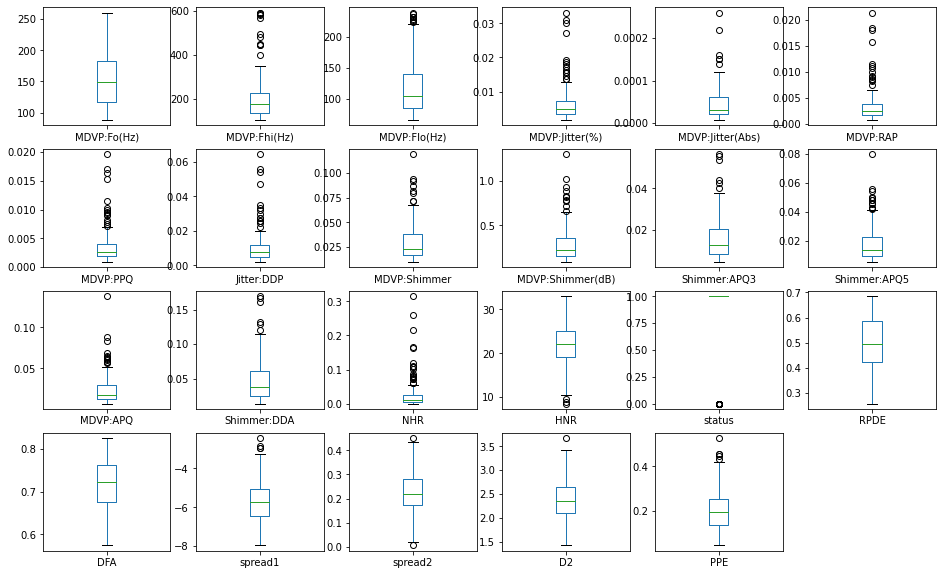

In [301]:
## Box Plot Distribution Charts
data.plot.box(subplots =True, layout = (4,6), figsize = (16,10));

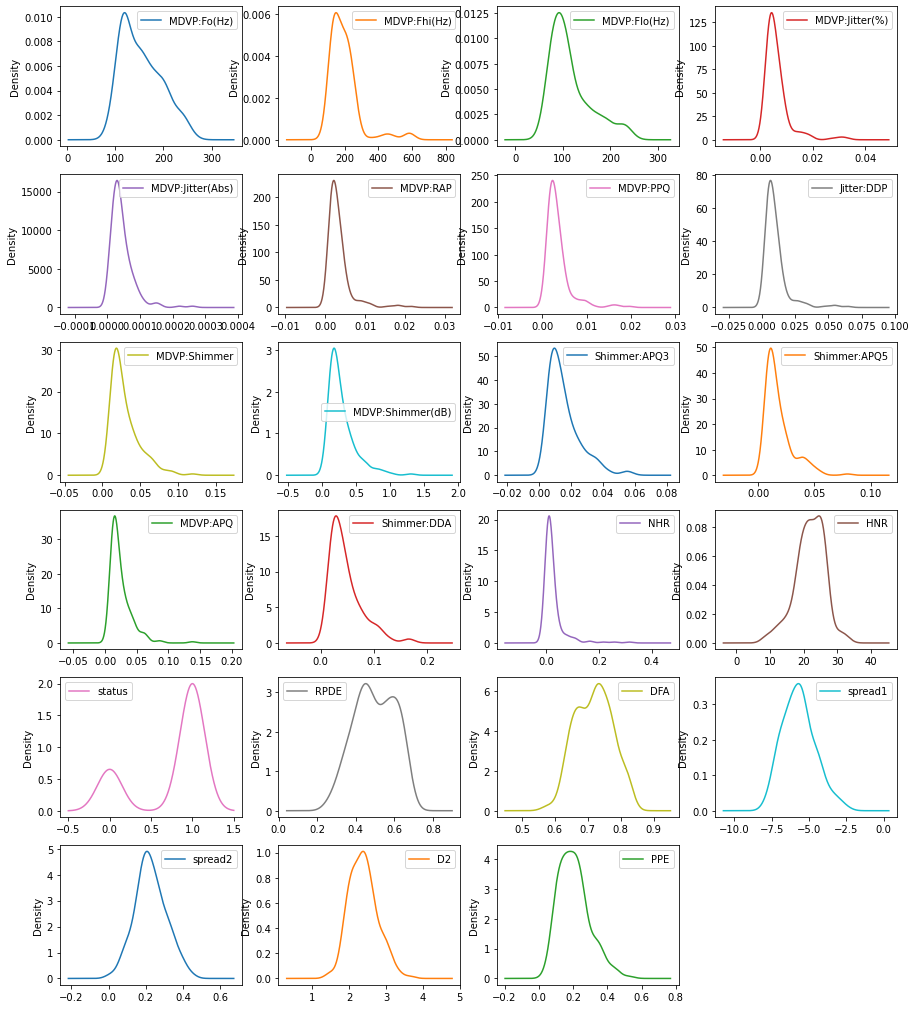

In [175]:
## Draw frequency chart 
data.plot.kde(subplots =True, layout = (6,4), figsize = (15,18), sharex=False);

##### Observations:
- 'RPDE', 'DFA','MDVP:Fo(Hz)' have no outliers
- 'Spread2' has outliers for higher and lower values
- 'HNR' has outliers in lower values
- Remaining columns have outliers for high values

#### Bivariate Analysis

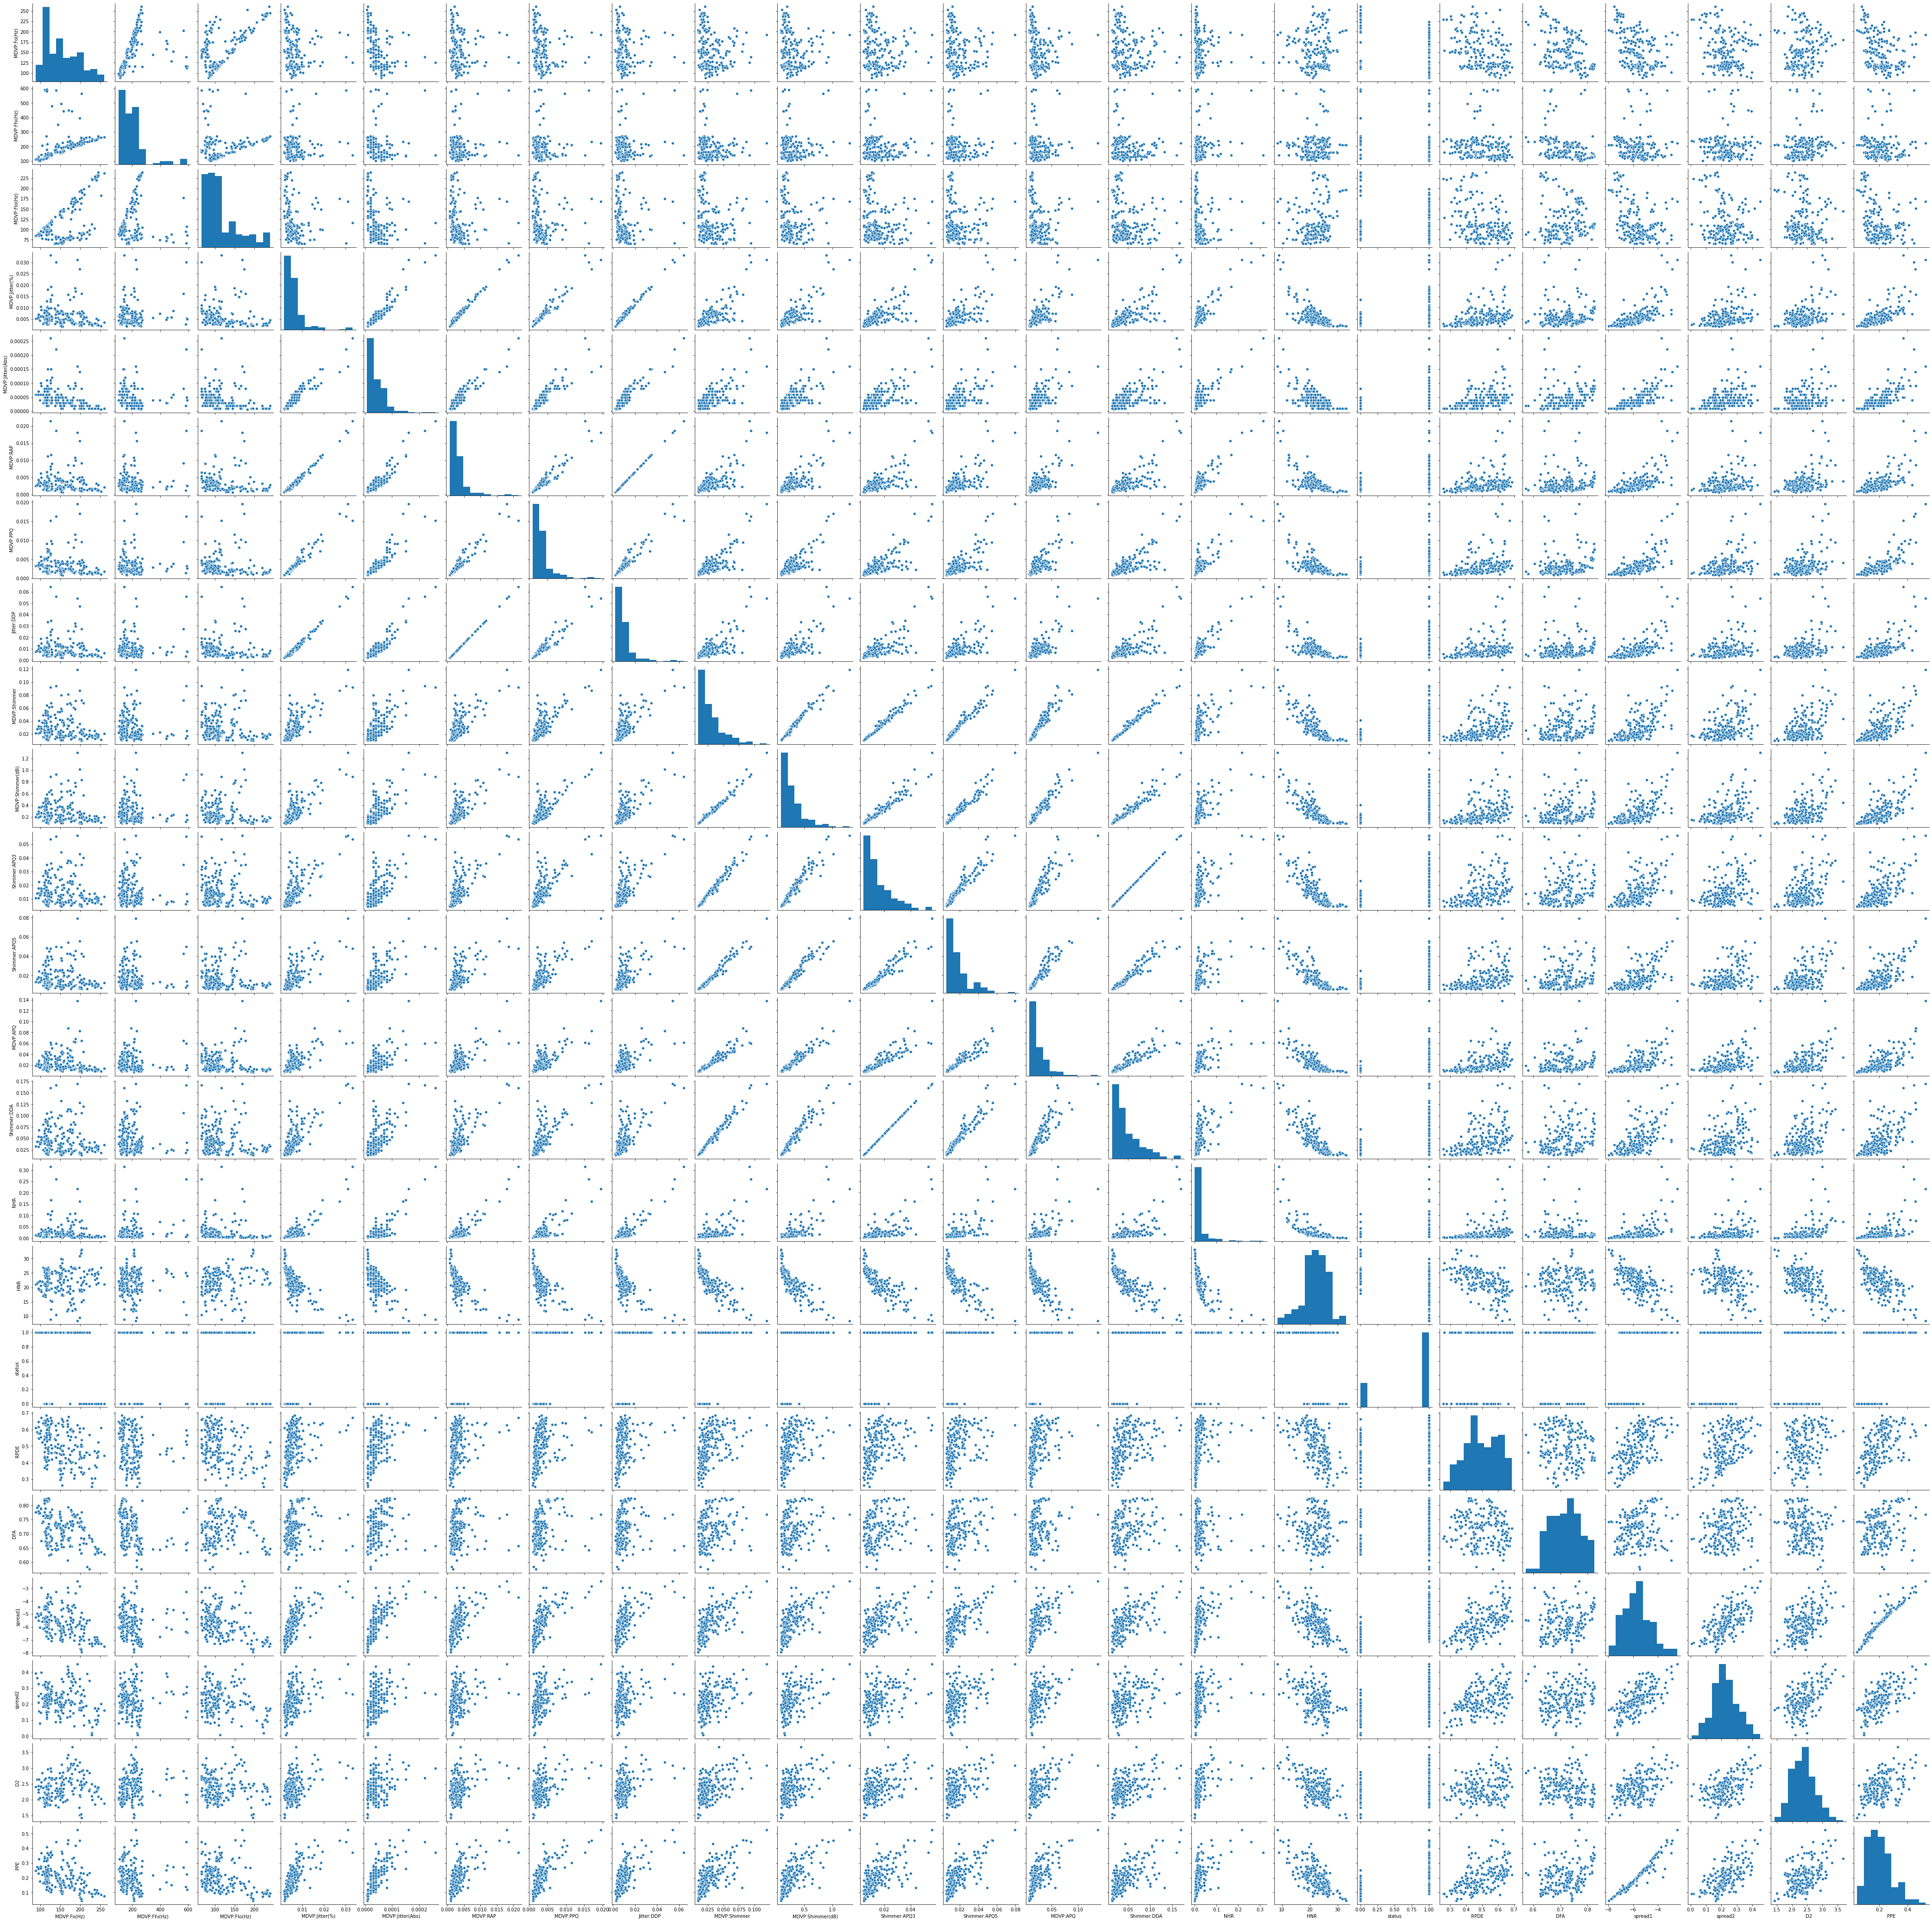

In [11]:
## Bivariate Analysis
sns.pairplot(data);

#### Observations
- Since the number of features is large, pairplot does not give any substantial information about relationship between variables
- However, in a glance, some features seem to be correlated with one another and this can further be investigated

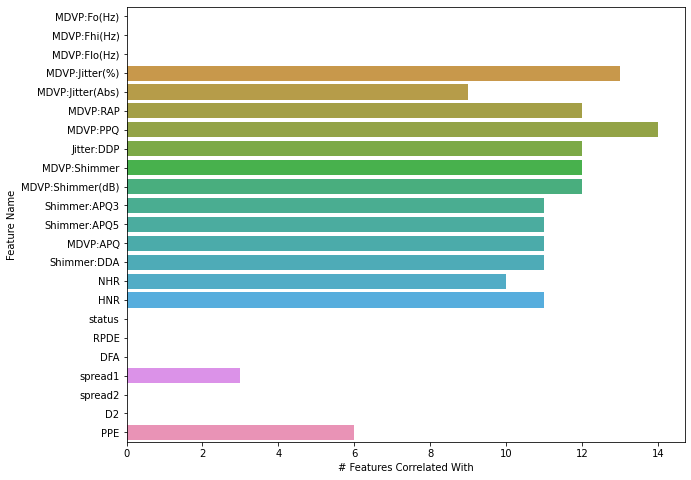

In [302]:
## Identifying highly correlated features
corr =data.corr()[(abs(data.corr())>0.7)& (abs(data.corr())<1)]
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(y = corr.count().index, x =corr.count(), ax = ax)
ax.set(xlabel="# Features Correlated With", ylabel='Feature Name');

Observations:
- The following 13 columns are highly correlated with the other columns
 - MDVP:Jitter(%),
 - MDVP:Jitter(Abs),
 - MDVP:RAP,
 - MDVP:PPQ,
 - Jitter:DDP,
 - MDVP:Shimmer,
 - MDVP:Shimmer(dB),
 - Shimmer:APQ3,
 - Shimmer:APQ5,
 - MDVP:APQ,
 - Shimmer:DDA,
 - NHR,
 - HNR
- These multicollinear columns may affect model performance in techniques like logistic regression

#### Analysing Name Column

In [3]:
# Number of unique values
data.name.nunique()

195

In [4]:
## Determing the Pattern of String
print("Number of Unique lengths for Name: ",data['name'].str.len().nunique())
print("The length of Names is", data['name'].str.len().unique()[0], "characters")

Number of Unique lengths for Name:  1
The length of Names is 14 characters


In [179]:
data['name'].head()

0    phon_R01_S01_1
1    phon_R01_S01_2
2    phon_R01_S01_3
3    phon_R01_S01_4
4    phon_R01_S01_5
Name: name, dtype: object

- The name column consists of 14 character codes that represent the Patient ID and the Recording Number

In [5]:
## Analysing Recordings per patient
data['recording_num'] = data['name'].str.slice(start=13, stop=14).astype(int)
data['patient_number'] = data['name'].str.slice(start=0, stop=12)

In [6]:
## Checking number of recordings per patient
data.groupby('patient_number')['recording_num'].nunique().value_counts()

6    29
7     3
Name: recording_num, dtype: int64

There are 29 patients with 6 recordings and 3 patients with 7 recordings

In [7]:
## Extracting the customers with 7 recordings
data[data['recording_num']==7][['patient_number','status']]

,patient_number,status
90,phon_R01_S21,1
121,phon_R01_S27,1
152,phon_R01_S35,1


All the customers with 7 recordings have Parkinson's Disease

In [8]:
## Does the target variable change with recording number for a given customer
print("The number of patients with multiple 'Status' values across different recordings is ",
      (data.groupby(['patient_number','recording_num'])['status'].nunique()>1)
      [(data.groupby(['patient_number','recording_num'])['status'].nunique()>1)].count())

The number of patients with multiple 'Status' values across different recordings is  0


In [9]:
### Do average column values change with recording number
a = data.groupby(['recording_num']).mean()
## Calculating Coeffcient of Variation
(a.std()/a.mean())

MDVP:Fo(Hz)         0.065683
MDVP:Fhi(Hz)        0.065774
MDVP:Flo(Hz)        0.042796
MDVP:Jitter(%)      0.372884
MDVP:Jitter(Abs)    0.216899
MDVP:RAP            0.398169
MDVP:PPQ            0.428943
Jitter:DDP          0.398310
MDVP:Shimmer        0.294497
MDVP:Shimmer(dB)    0.367006
Shimmer:APQ3        0.279707
Shimmer:APQ5        0.325524
MDVP:APQ            0.344205
Shimmer:DDA         0.279683
NHR                 0.735816
HNR                 0.104869
status              0.120261
RPDE                0.038146
DFA                 0.006293
spread1            -0.117269
spread2             0.184847
D2                  0.104696
PPE                 0.215072
dtype: float64

The coefficient of variation is low for all the variables across different recordings. Thus recording number does not add much additional information and can be excluded from model

#### Analysing Target Variable

In [309]:
## Analysing Target Variable
round(data['status'].value_counts(normalize=True)*100)

1    75.0
0    25.0
Name: status, dtype: float64

Observations:
- The data set has about 75% of cases suffering from Parkinson disease and 25% of cases which are healthy
- This is a case of imbalanced dataset
    - Oversampling techniques could be tried to increase number of rows as well as balance the data
    - Downsampling is not a good option since the number of rows are already less

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


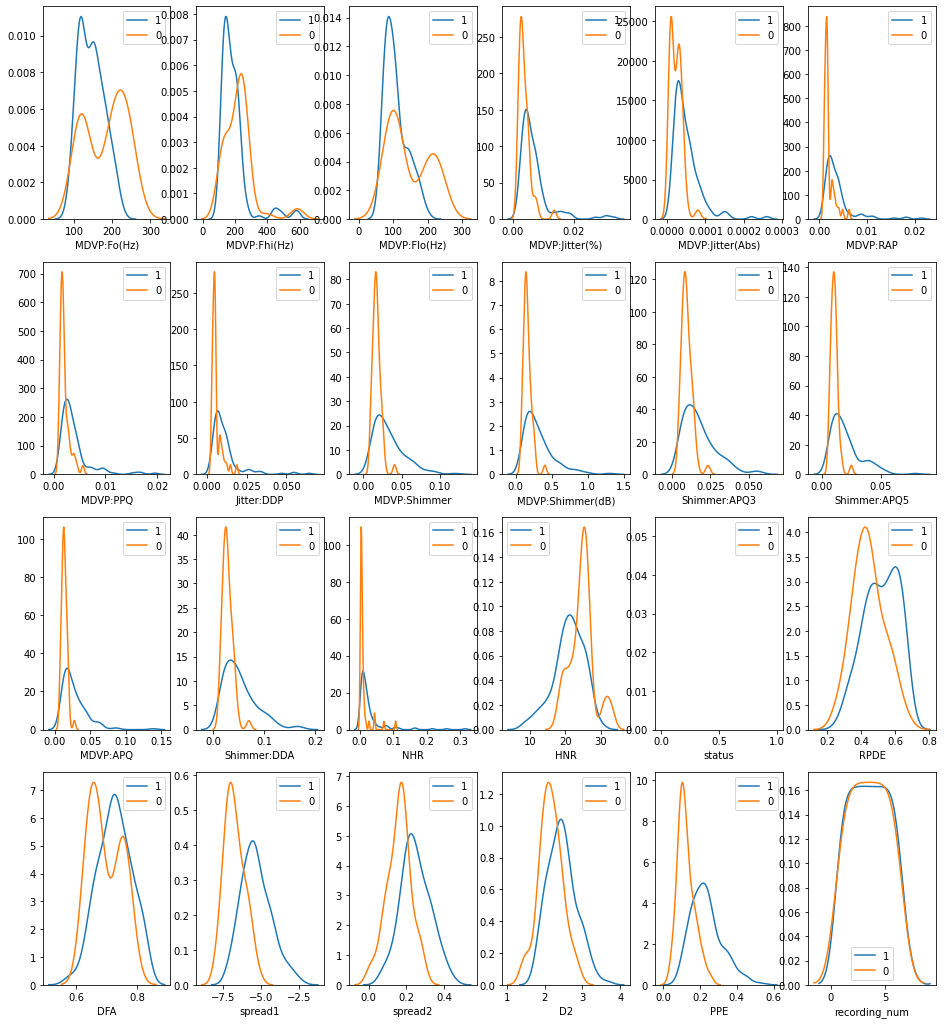

In [197]:
## Distribution of Variables by Target Column Value
fig, ax = plt.subplots(4,6, figsize = (16,18), sharex=False)
x=0
for i in range(0,4):
    for j in range(0,6):
        name = data.drop(['name','patient_number'],axis =1).columns[x]
        sns.distplot(data.loc[data['status']==1,name], ax = ax[i,j],hist =False, label = '1')
        sns.distplot(data.loc[data['status']==0,name], ax = ax[i,j], hist =False, label = '0')
        x= x+1

##### Observations
- For most columns,the distribution for each value of 'Status' is similar
- The Spread of distribution for Status =0 is lesser than that of Status =1, in most features


### Data Preparation

In [10]:
X = data.drop(['recording_num','patient_number','name','status'], axis =1)
y = data['status']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state =1)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((136, 22), (59, 22), (136,), (59,))

In [11]:
print("The train dataset has {0}% Positive and {1}% Negative Parkinson Disease records".format(int(y_train.value_counts(normalize=True)[0]*100),int(y_train.value_counts(normalize=True)[1]*100)))
print("The test dataset has {0}% Positive and {1}% Negative Parkinson Disease records".format(int(y_test.value_counts(normalize=True)[0]*100),int(y_test.value_counts(normalize=True)[1]*100)))


The train dataset has 21% Positive and 78% Negative Parkinson Disease records
The test dataset has 32% Positive and 67% Negative Parkinson Disease records


In [12]:
## Scaling the train and test dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_scaled = scaler.fit_transform(X)

### Modelling

### Standard Classification Algorithms:
Creating basic models to understand performance using simple ML techniques. We'll build models for the following algorithms - 
- Logistic Regression
- SVM
- K Nearest Neighbors
- Naive Bayes

#### Fitting Standard ML Models

In [22]:
## Train-Test Setup
names = ["Logistic Regression", "Naive Bayes","K-NN","SVM","Decision Trees"]
classifiers = [
    LogisticRegression(solver="liblinear"),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors= 14 , weights = 'distance'),
    svm.SVC(gamma =0.01 , C =1, kernel ='rbf'),
    DecisionTreeClassifier(max_depth =4,random_state =1)
]
   

# iterate over classifiers 
score = pd.DataFrame(index = ["Train Accuracy","Test Accuracy"] )
for name,clf in zip(names, classifiers):
        if name in ['Naive Bayes','Decision Trees']:
            clf.fit(X_train, y_train)
            y_train_pred = clf.predict(X_train)
            y_test_pred = clf.predict(X_test)
        else:
            clf.fit(X_train_scaled, y_train)
            y_train_pred = clf.predict(X_train_scaled)
            y_test_pred = clf.predict(X_test_scaled)
        score[name] = [round(metrics.accuracy_score(y_train_pred,y_train)*100,0),round(metrics.accuracy_score(y_test_pred,y_test)*100,0)]

In [23]:
## Accuracy scores
score

,Logistic Regression,Naive Bayes,K-NN,SVM,Decision Trees
Train Accuracy,90.0,71.0,100.0,90.0,98.0
Test Accuracy,86.0,71.0,76.0,80.0,80.0


We can clearly see that there is overfitting. Since the data size is small and there is a tendency is to overfit, K fold cross validation method would be a better way of model fitting

In [24]:
## CV Setup
names = ["Logistic Regression", "Naive Bayes","K-NN","SVM","Decision Trees"]
classifiers = [
    LogisticRegression(solver="liblinear"),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors= 15 , weights = 'distance'),
    svm.SVC(gamma =0.01 , C =1, kernel ='rbf'),
    DecisionTreeClassifier(max_depth =4,random_state =1)
]
   

# iterate over classifiers 
score_cv = pd.DataFrame(index = ["Cross Val Accuracy"] )
for name,clf in zip(names, classifiers):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    if name in ['Naive Bayes','Decision Trees']:
        scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    else:
        scores = cross_val_score(clf, X_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
    score_cv[name] = [round(np.mean(scores)*100)]

In [25]:
## Model Performance
score.append(score_cv)

,Logistic Regression,Naive Bayes,K-NN,SVM,Decision Trees
Train Accuracy,90.0,71.0,100.0,90.0,98.0
Test Accuracy,86.0,71.0,76.0,80.0,80.0
Cross Val Accuracy,83.0,71.0,89.0,86.0,85.0


##### Observations

- SVM and KNN are the top performing methods.  This could be because these algorithms are good at capturing non linearly separable trends and are lesser prone to overfitting
- Logistic Model performs third best among all the techniques. The lowered performance could be due to the presence of strong correlation among large number of features
- Decision Tree is also third best among all the techniques. Generally tree based algorithms perform best in cases of large datasets. The small size of data could be bringing down the model performance
- Naive Baye's has the least accuracy. This could be because the dataset has an imbalanced target variable. Since Naive Bayes is based on probabilities of each of the target classes, having lesser number of negative class records in the data affects it's performance
- The difference in Train-Test setup and CV setup could be because, the test data is different from train and is adding valuable information to the model. Using CV setup ensures that all the data available is provided to the model and also prevents overfitting.

### Feature Selection
We will use the feature importance generated from decision tress to select a subset of relevant features for further modelling. Reduction in dimensionality could imporove model accuracy and reduce computational time for the more complex models to be implemented going ahead

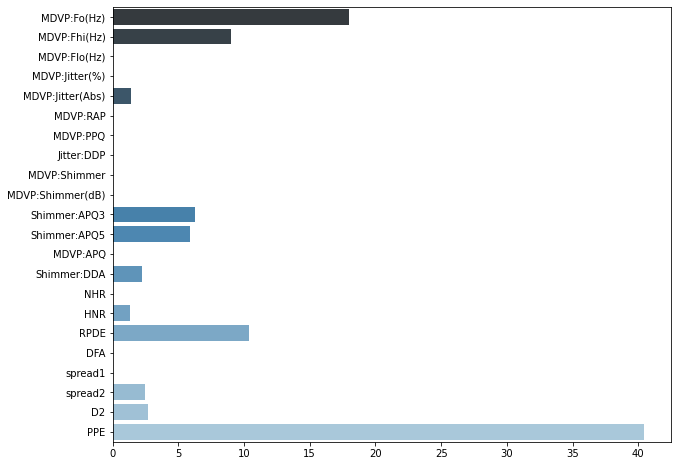

In [26]:
model = DecisionTreeClassifier( random_state =1, criterion = 'gini')
model.fit(X,y)

fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x =(model.feature_importances_)*100,y =X.columns,palette="Blues_d", ax = ax);
            ##order = 'descending')

Only 11 out of 24 variables have a non zero importance while creating decision trees. We can shortist the top 11 variables for further model building

In [27]:
## Creating subset of important features
feat_imp = pd.DataFrame(model.feature_importances_*100, index= X.columns, columns = ["Importance"])
X_subset = X[feat_imp.loc[feat_imp['Importance']>0,:].index]
X_train_subset = X_train[feat_imp.loc[feat_imp['Importance']>0,:].index]
X_test_subset = X_test[feat_imp.loc[feat_imp['Importance']>0,:].index]

In [28]:
X_subset.shape

(195, 11)

In [29]:
## Scaling New Dataset
scaler = StandardScaler()
X_subset_scaled = scaler.fit_transform(X_subset)
X_train_subset_scaled = scaler.fit_transform(X_train_subset)
X_test_subset_scaled = scaler.fit_transform(X_test_subset)

### Standard Classification Algorithms using Shortlisted Features

#### Parameter Estimates
Before we build the model with subset of features,let us explore the best hyper -parameter/parameter values to use

##### Selecting best K value for KNN

In [30]:
## Setting Value of K
error = []
for i in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors= i , weights = 'distance' )
    knn_model.fit(X_train_subset_scaled, y_train)
    prediction_i = knn_model.predict(X_test_subset_scaled)
    error.append(np.mean(prediction_i!=y_test))

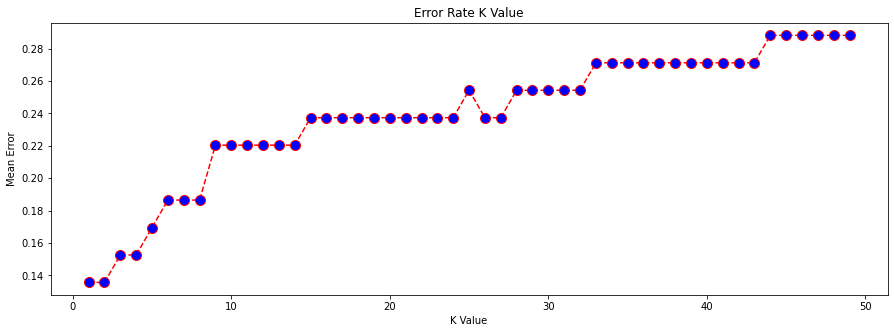

In [31]:
plt.figure(figsize=(15, 5))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error');

The best K value = 9

##### Grid Search for hyper parameter combination for SVM

In [32]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=False)
x=grid.fit(X_subset_scaled,y)

In [33]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.1, kernel='poly')


Based on above grid search, we will use parameters C=1 and gamma 0.1 for modelling

In [63]:
## Hyper parameter tuning for Decision Trees
param_grid = {'max_depth': range(1,12)}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=False)
grid.fit(X_subset_scaled,y);

In [64]:
print(grid.best_estimator_)

DecisionTreeClassifier(max_depth=4)


Based on above grid search, we will use max_depth=4

#### Creating Model with Selected Features

In [85]:
## CV Setup
names = ["Logistic Regression", "Naive Bayes","K-NN","SVM","Decision Trees"]
classifiers = [
    LogisticRegression(solver="liblinear"),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors =9,weights = 'distance'),
    svm.SVC(gamma =0.1 , C =1, kernel ='poly'),
    DecisionTreeClassifier(max_depth = 4, random_state =1)
]
   

# iterate over classifiers 
score_cv_subset = pd.DataFrame(index = ["Cross Val Accuracy Subset"] )
for name,clf in zip(names, classifiers):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    if name in ['Naive Bayes','Decision Trees']:
        scores = cross_val_score(clf, X_subset, y, scoring='accuracy', cv=cv, n_jobs=-1)
        
    else:
        scores = cross_val_score(clf, X_subset_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
    score_cv_subset[name] = [round(np.mean(scores)*100)]
score_cv.append(score_cv_subset)

,Logistic Regression,Naive Bayes,K-NN,SVM,Decision Trees
Cross Val Accuracy,83,71,89,86,85
Cross Val Accuracy Subset,84,75,89,88,87


##### Observations
- The accuaracy has increased for all models. This shows that no drastic information was lost by removing the variables. In fact, by reducing noise, model accuracy improved.

- The top performing algorithms so far are 
    1. KNN
    2. SVM
    3. Decision Trees

### Ensemble Models
To improve model performance, we will try Random Forest and some bagging and boosting Ensemble models

In [86]:
## Creating Random Forest and basic Bagging models
names = ["Random Forest","Bagging- Logistic Regression", "Bagging -Naive Bayes","Bagging - K-NN","Bagging -SVM","Bagging -Decision Trees"]
classifiers = [
    RandomForestClassifier(random_state=1, n_estimators=100),
    BaggingClassifier(base_estimator = LogisticRegression(solver="liblinear") , n_estimators=100,random_state=1),
    BaggingClassifier(base_estimator = GaussianNB() , n_estimators=100,random_state=1),
    BaggingClassifier(base_estimator = KNeighborsClassifier() , n_estimators=100,random_state=1),
    BaggingClassifier(base_estimator = svm.SVC() , n_estimators=100,random_state=1),
    BaggingClassifier(base_estimator = DecisionTreeClassifier() , n_estimators=100,random_state=1)]
   
score_cv_ens = pd.DataFrame(index = ["Cross Val Accuracy Subset"])
# iterate over classifiers 
# iterate over classifiers 
for name,clf in zip(names, classifiers):
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        scores = cross_val_score(clf, X_subset_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
        score_cv_ens[name] = [round(np.mean(scores)*100)]

In [87]:
score_cv_ens

,Random Forest,Bagging- Logistic Regression,Bagging -Naive Bayes,Bagging - K-NN,Bagging -SVM,Bagging -Decision Trees
Cross Val Accuracy Subset,93,84,74,91,89,92


- Random Forest, Bagged Decision Trees and Bagged KNN show the best performance compared the the best performing basic ML algorithms explored so far

#### Boosting Techniques

In [88]:
names = ["AdaBoostClassifier", "GradientBoostClassifier"]
classifiers = [
    AdaBoostClassifier(n_estimators=100, random_state=1,learning_rate =0.0001),
    GradientBoostingClassifier(n_estimators = 100,random_state=1,learning_rate =0.0001)]   

# iterate over classifiers 
for name,clf in zip(names, classifiers):
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        scores = cross_val_score(clf, X_subset_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
        score_cv_ens[name] = [round(np.mean(scores)*100)]
## Introducing small learning rate helps reduce overfitting of Boosting models

In [89]:
score_cv_ens

,Random Forest,Bagging- Logistic Regression,Bagging -Naive Bayes,Bagging - K-NN,Bagging -SVM,Bagging -Decision Trees,AdaBoostClassifier,GradientBoostClassifier
Cross Val Accuracy Subset,93,84,74,91,89,92,84,75


##### Observations
- Boosting Techniques do not improve the model performance for this dataset.
- This could be because Boosting techniques help in reducing bias, however, in this situation, it is required to reduce variance. The base estimators itself are strong and thus by boosting ensemble, there is not much scope to reduce the bias further. 
- Bagging on the other hand, aims at reducing variance. This is ideal for cases of overfitting. Since the current dataset is prone to overfitting, bagging proves to add more value as compared to boosting

### Meta Classifier: Stacking
Since we have a set of well performing models already, we could try Stacking these models to further improve model performance.

I am going to use the following top models from above for stacking

1. SVM
2. KNN
3. Decision Trees
4. Random Forest
5. Bagged Decision Trees
6. Bagged KNN

In [71]:
## Stacking Base Estimators

base_estimators = [('KNN', KNeighborsClassifier(weights = 'distance')),
              ('SVM', svm.SVC(gamma =0.01 , C =100, kernel ='rbf')),
              ('Random Forest',RandomForestClassifier(random_state=1, n_estimators=100)),
              ('Naive Bayes',GaussianNB()),
              ('Bagged Decision Trees',BaggingClassifier(base_estimator = DecisionTreeClassifier() , n_estimators=100,random_state=1)),
              ('Bagged KNN',BaggingClassifier(base_estimator = KNeighborsClassifier() , n_estimators=100,random_state=1)),
              ('Decision Trees',DecisionTreeClassifier(max_depth = 4, random_state =1))]

# iterate over classifiers 
model = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression(solver="liblinear"), cv=10)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
stacked_scores = cross_val_score(model, X_subset, y, scoring='accuracy', cv=cv, n_jobs=-1)
stacked_f1 = cross_val_score(model, X_subset, y, scoring='f1', cv=cv, n_jobs=-1)
stacked_precision = cross_val_score(model, X_subset, y, scoring='precision', cv=cv, n_jobs=-1)
stacked_recall = cross_val_score(model, X_subset, y, scoring='recall', cv=cv, n_jobs=-1)

In [72]:
print("Accuracy of Stacked Model = ",round(np.mean(stacked_scores)*100),"%")

Accuracy of Stacked Model =  94 %


By stacking the models, the performance is better than the best performing model so far, which is Random Forest

 ### Comparison of Models

The top performing models and their performance accuracy is given below

In [80]:
names = ["Random Forest", "Bagged Decision Trees","Bagged KNN","K-NN","SVM","Decision Trees"]
classifiers = [RandomForestClassifier(random_state=1, n_estimators=100),
               BaggingClassifier(base_estimator = DecisionTreeClassifier() , n_estimators=100,random_state=1),
               BaggingClassifier(base_estimator = KNeighborsClassifier() , n_estimators=100,random_state=1),
               KNeighborsClassifier(n_neighbors =9, weights = 'distance'),
               svm.SVC(gamma =0.1 , C =1, kernel ='poly'),
               DecisionTreeClassifier(max_depth = 4, random_state =1)]
   

# iterate over classifiers 
model_cv_scores = pd.DataFrame(stacked_scores,columns = ["Stacked Model"])
model_cv_others = pd.DataFrame([np.mean(stacked_f1),np.mean(stacked_precision),np.mean(stacked_recall)],columns = ["Stacked Model"],index = ["F1 Score","Precision","Recall"])
for name,clf in zip(names, classifiers):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    if name in ['Decision Trees','Random Forest','Bagged Decision Trees']:
        scores = cross_val_score(clf, X_subset, y, scoring='accuracy', cv=cv, n_jobs=-1)
        f1score = cross_val_score(clf, X_subset, y, scoring='f1', cv=cv, n_jobs=-1)
        precision = cross_val_score(clf, X_subset, y, scoring='precision', cv=cv, n_jobs=-1)
        recall = cross_val_score(clf, X_subset, y, scoring='recall', cv=cv, n_jobs=-1)
    else:
        scores = cross_val_score(clf, X_subset_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
        f1score = cross_val_score(clf, X_subset_scaled, y, scoring='f1', cv=cv, n_jobs=-1)
        precision = cross_val_score(clf, X_subset_scaled, y, scoring='precision', cv=cv, n_jobs=-1)
        recall = cross_val_score(clf, X_subset_scaled, y, scoring='recall', cv=cv, n_jobs=-1)
    model_cv_scores[name] = scores
    model_cv_others.loc['F1 Score',name] = np.mean(f1score)
    model_cv_others.loc['Precision',name] = np.mean(precision)
    model_cv_others.loc['Recall',name] = np.mean(recall)

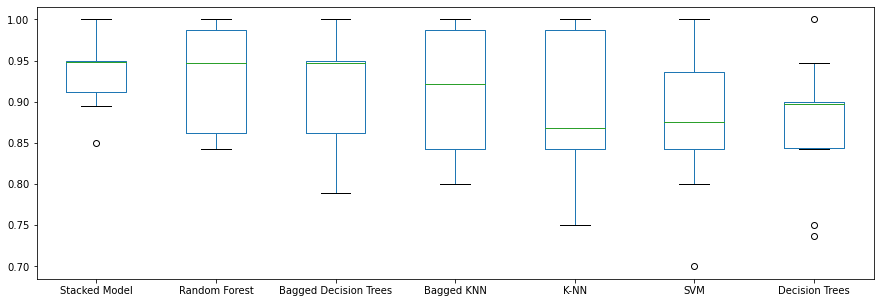

In [84]:
fig, ax = plt.subplots(figsize=(15,5))
model_cv_scores.plot.box(ax = ax);

In [357]:
model_cv_others.T

,F1 Score,Precision,Recall
Stacked Model,0.952759,0.926211,0.985417
Random Forest,0.948584,0.923505,0.978333
Bagged Decision Trees,0.940691,0.922223,0.963750
Bagged KNN,0.911892,0.875795,0.956479
K-NN,0.890776,0.872628,0.916306
SVM,0.890877,0.873846,0.912820
Decision Trees,0.919048,0.932992,0.918333


- The Stacked Model, Random Forest and Bagged Decision Tree model show the best performance with an average accuracy of 93% on the CV test sets
- Looking at the boxplot above, Stacked model shows the least spread in the accuracy values across the 10 folds and thus can be considered the best model compared to the remaining 2 top models.
- Since this is a case of imbalanced dataset,the accuracy would tend to be high. However, it is also important to have a high F1 score value for a good model. In this case, the F-score value is highest for the Stacked model

## Summary and Conclusion

- We applied several standard classification techniques, ensemble methods as well as meta classification methods to compare the accuracy on test data
- We implemented cross validation technique to deal with drawback of small dataset size and potential problems of overfitting
- We shorlisted Top 11 important variables for the model based on the decision tree feature importance
- The Stacked Model is the best model among the rest because
     - It has the highest accuracy and lowest variance in accuaracy across folds
     - Highest F1 Score Value